## Firing Rate Model

Write a homogenous Poisson process firing rate model to simulate three contrast sensitive sensory neurons. The firing rate from the input stimuli should follow the function 
, where the contrast intensity is defined via Michelson contrast and ranges from [0 1].
Each trial should last for 300 ms.
The contrast intensity of each trial will eventually be determined by the needs of the psychometric curve, but initial testing can be done without it.
Calculating the interspike interval will be more computationally efficient than a full moment-to-moment simulation, but potentially more complicated to code. You may make the choice here.

## Notes:

### To load data generated by this code, run the following:

spike_outputs = np.load("part_1_spike_outputs.npy")

timestamps = np.load("timestamps.npy")

contrast_values = np.load("contrast_values.npy")

### spike_outputs data shape is the following: 

(8, 3, 30, 3000) 

(Contrast Input x Neuron x Trial x Time)

#### Contrast intensities used from the psychometric curve:

contrast_values = [0.0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
time_duration = 300 # ms
num_inputs = int(time_duration/dt)
timestamps = np.arange(start=0, stop=time_duration, step=dt)

contrast_values = np.array([0.0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9])

In [2]:
def calculate_firing_rate(contrasts):
    return 10*np.log(20*contrasts + 1)/100
    
def homogenous_poisson_neuron(rates):
    spikes = np.random.rand(len(rates)) < rates*dt #check on comparison
    spike_times = np.where(spikes != 0)
    return spikes

def raster_plot(time,spikes,pos = 0):
    spike_fired = np.where(spikes != 0)
    plt.scatter(time[spike_fired],spikes[spike_fired]+pos,marker='|',linewidths=2)

In [3]:
# Generate Numpy Array (npy) 

def generate_spike_outputs(contrast_values):
    spike_output = []
    for c in range(len(contrast_values)):
        # Run for 30 trials
        filename = "spike_output_contrast" + str(c) + ".csv"
        contrasts = np.ones(num_inputs)*contrast_values[c]
        firing_rates = calculate_firing_rate(contrasts)

        spikes = []

        # Generate Spikes/Times for 3 Neurons
        for i in range(3):
            spikes_per_neuron = []
            for t in range(30):
                s = homogenous_poisson_neuron(firing_rates)
                spikes_per_neuron.append(s)
            spikes.append(spikes_per_neuron)
            
        spike_output.append(spikes)
        print("Contrast ", str(contrast_values[c]) ,"Done")
    
    return spike_output

spike_outputs = generate_spike_outputs(contrast_values)

np.save("part_1_spike_outputs.npy", spike_outputs)

print("Shape of Spike Output Array:", np.shape(spike_outputs))

Contrast  0.0 Done
Contrast  0.1 Done
Contrast  0.3 Done
Contrast  0.4 Done
Contrast  0.5 Done
Contrast  0.6 Done
Contrast  0.7 Done
Contrast  0.9 Done
Shape of Spike Output Array: (8, 3, 30, 3000)


Data is in the form of Contrast Input x Neuron x Trial x Time


In [4]:
np.save("part_1_spike_outputs.npy", spike_outputs)
np.save("timestamps.npy", timestamps)
np.save("contrast_values.npy", contrast_values)

# Load Data and Verify it Matches

load_data = np.load("part_1_spike_outputs.npy")
print(np.shape(spike_outputs) == np.shape(load_data))

True


## Some Visualizations

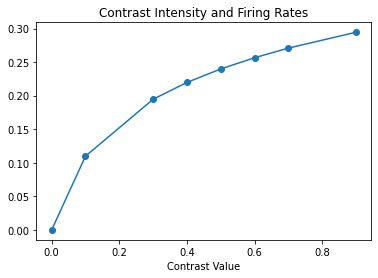

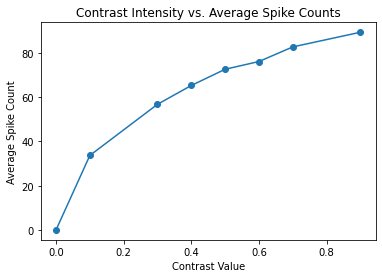

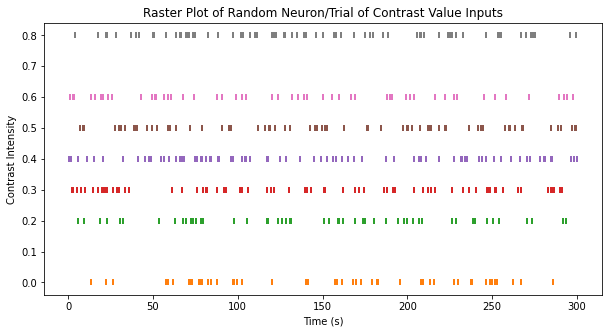

In [5]:
# Plot Inputs - Contrasts and Firing Rates

plt.plot(contrast_values, calculate_firing_rate(contrast_values), "-o")
plt.title("Contrast Intensity and Firing Rates")
plt.xlabel("Contrast Value")
plt.show()

# Plot Average Spike Counts

avg_spike_count = []
for i in range(len(contrast_values)):
    data = spike_outputs[i]
    avg_spike_count.append(np.average(np.sum(data[0], axis=1)))
    
plt.plot(contrast_values, avg_spike_count, '-o')
plt.title("Contrast Intensity vs. Average Spike Counts")
plt.ylabel("Average Spike Count")
plt.xlabel("Contrast Value")
plt.show()

# Plot random neuron/trial example to see varying firing rate due to changing stimulus input (contrast intensity)

plt.figure(figsize=(10,5))
for i in range(len(contrast_values)):
    data = spike_outputs[i]
    rand_neuron = np.random.randint(0,3)
    rand_trial = np.random.randint(0,30)
    
    raster_plot(timestamps,data[rand_neuron][rand_trial],pos=contrast_values[i]-1.1)
plt.ylabel("Contrast Intensity")
plt.xlabel("Time (s)")
plt.title("Raster Plot of Random Neuron/Trial of Contrast Value Inputs")
plt.show()
    

In [6]:
# Other Junk

# def michelson_contrast(frames):
#     output = np.zeros(len(frames))
#     for i in range(len(frames)):
#         I_max = np.max(frames[i])
#         I_min = np.min(frames[i])
#         output[i] = (I_max - I_min)/(I_max + I_min)
#     print(np.shape(output))
#     print(output)
#     return output

In [7]:
# def save_csv(array, filename):
#     np.savetxt(filename, array, delimiter=",")
#     print("Saved as ", filename)

# save_csv(spikes, "step_1_three_neuron_output.csv")

In [8]:
# # One single trial

# contrasts = np.ones(num_inputs)*0.5
# firing_rates = calculate_firing_rate(contrasts)
# spikes = []

# # Generate Spikes/Times for 3 Neurons
# for i in range(3):
#     s = homogenous_poisson_neuron(firing_rates)
#     spikes.append(s)

# print("Shape of Spike Output Array:", np.shape(spikes))
# print("Neuron 1 = ", np.sum(spikes[0]) , " spikes")
# print("Neuron 2 = ", np.sum(spikes[1]) , " spikes")
# print("Neuron 3 = ", np.sum(spikes[2]) , " spikes")

In [9]:
# # Run for 30 trials

# contrasts = np.ones(num_inputs)*0.5
# firing_rates = calculate_firing_rate(contrasts)
# spikes = []

# # Generate Spikes/Times for 3 Neurons
# for i in range(3):
#     spikes_per_neuron = []
#     for t in range(30):
#         s = homogenous_poisson_neuron(firing_rates)
#         spikes_per_neuron.append(s)
#     spikes.append(spikes_per_neuron)

# print("Shape of Spike Output Array:", np.shape(spikes))
# print("Neuron 1 = ", np.average(np.sum(spikes[0], axis = 1)) , " avg spikes")
# print("Neuron 2 = ", np.average(np.sum(spikes[1], axis = 1))  , " avg spikes")
# print("Neuron 3 = ", np.average(np.sum(spikes[2], axis = 1))  , " avg spikes")